In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']

In [5]:
df.columns = col_names

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
# class -> target (y)

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [12]:
df['doors'] = df['doors'].replace('5more','5')

In [13]:
df['doors'] = df['doors'].astype(int)

In [14]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [15]:
df['persons'] = df['persons'].replace('more','5')

In [16]:
df['persons'] = df['persons'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


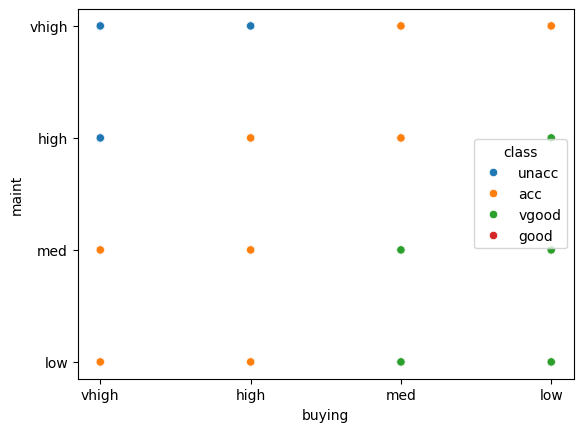

In [18]:
sns.scatterplot(x=df['buying'],y=df['maint'],hue=df['class'])
plt.show()

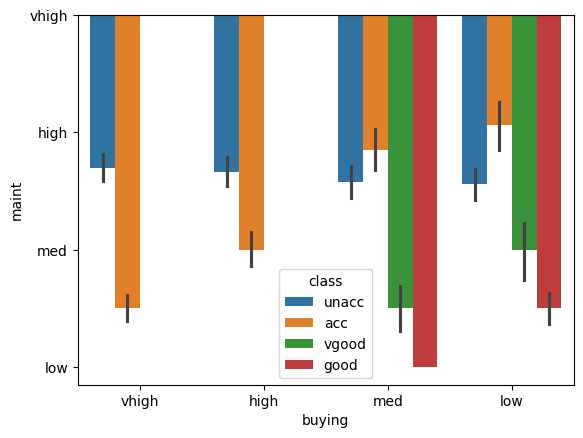

In [19]:
sns.barplot(x=df['buying'],y=df['maint'],hue=df['class'])
plt.show()

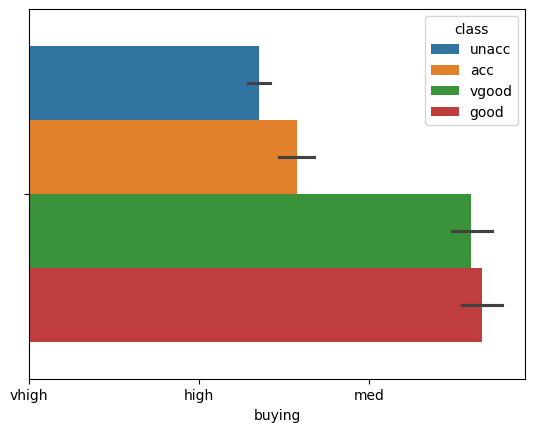

In [20]:
sns.barplot(x=df['buying'],hue=df['class'])
plt.show()

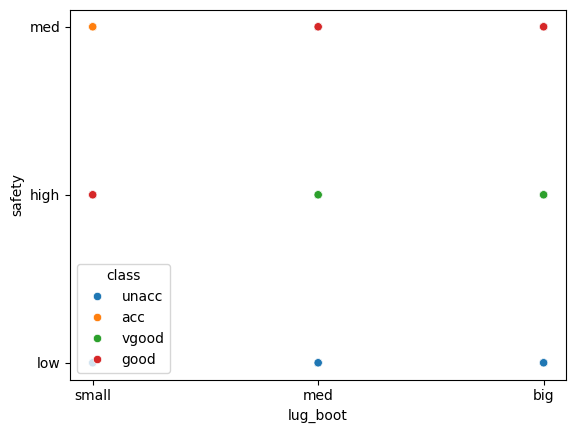

In [21]:
sns.scatterplot(x=df['lug_boot'],y=df['safety'],hue=df['class'])
plt.show()

In [22]:
X = df.drop('class',axis=1)
y = df['class']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [25]:
X_train.shape

(1208, 6)

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
categorical_cols = ['buying','maint','lug_boot','safety']
numerical_cols = ['doors','persons']

ordinal_encoder = OrdinalEncoder(categories=[
    ['low','med','high','vhigh'],
    ['low','med','high','vhigh'],
    ['small','med','big'],
    ['low','med','high']
])

preprocessor = ColumnTransformer(transformers=[('transformation_name',ordinal_encoder,categorical_cols)],
                                remainder='passthrough')

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [28]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5
0,0.0,3.0,1.0,1.0,3.0,2.0
1,0.0,2.0,1.0,1.0,5.0,4.0
2,0.0,2.0,0.0,1.0,3.0,4.0
3,0.0,3.0,2.0,2.0,2.0,5.0
4,1.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...
1203,2.0,1.0,0.0,2.0,2.0,5.0
1204,3.0,2.0,1.0,1.0,3.0,5.0
1205,3.0,0.0,2.0,1.0,4.0,2.0
1206,2.0,2.0,2.0,1.0,5.0,5.0


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)

In [31]:
tree_model.fit(X_train_transformed,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [32]:
y_pred = tree_model.predict(X_test_transformed)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))
print("accuracy_score: \n", accuracy_score(y_test,y_pred))
print("classification_report: \n", classification_report(y_test,y_pred))

confusion_matrix: 
 [[101  20   0   0]
 [  0  21   0   0]
 [ 50   0 306   0]
 [  4  17   0   0]]
accuracy_score: 
 0.8246628131021194
classification_report: 
               precision    recall  f1-score   support

         acc       0.65      0.83      0.73       121
        good       0.36      1.00      0.53        21
       unacc       1.00      0.86      0.92       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.82       519
   macro avg       0.50      0.67      0.55       519
weighted avg       0.85      0.82      0.83       519



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

column_names = categorical_cols + numerical_cols

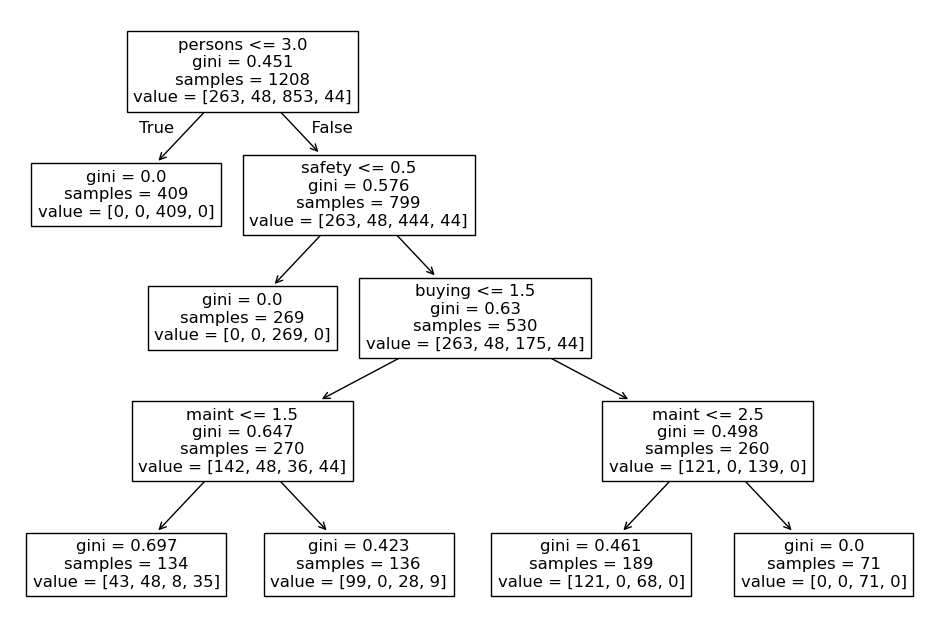

In [36]:
tree.plot_tree(tree_model.fit(X_train_transformed,y_train),feature_names=column_names)
plt.show()

In [37]:
# hyperparameter

In [39]:
param = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best","random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt","log2",None]
}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,cv=5,scoring="accuracy")

In [42]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [43]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'random'}

In [45]:
grid.best_score_

np.float64(0.967713727238435)

In [46]:
y_pred = grid.predict(X_test_transformed)

In [47]:
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))
print("accuracy_score: \n", accuracy_score(y_test,y_pred))
print("classification_report: \n", classification_report(y_test,y_pred))

confusion_matrix: 
 [[115   0   5   1]
 [  1  20   0   0]
 [  8   0 348   0]
 [  0   0   0  21]]
accuracy_score: 
 0.9710982658959537
classification_report: 
               precision    recall  f1-score   support

         acc       0.93      0.95      0.94       121
        good       1.00      0.95      0.98        21
       unacc       0.99      0.98      0.98       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



In [48]:
tree_model_new = DecisionTreeClassifier(criterion="log_loss",max_depth=15,max_features=None,splitter="random")

In [49]:
tree_model_new.fit(X_train_transformed,y_train)
y_pred = tree_model_new.predict(X_test_transformed)
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))
print("accuracy_score: \n", accuracy_score(y_test,y_pred))
print("classification_report: \n", classification_report(y_test,y_pred))

confusion_matrix: 
 [[113   0   8   0]
 [  0  19   0   2]
 [  9   0 347   0]
 [  0   0   0  21]]
accuracy_score: 
 0.9633911368015414
classification_report: 
               precision    recall  f1-score   support

         acc       0.93      0.93      0.93       121
        good       1.00      0.90      0.95        21
       unacc       0.98      0.97      0.98       356
       vgood       0.91      1.00      0.95        21

    accuracy                           0.96       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.96      0.96      0.96       519



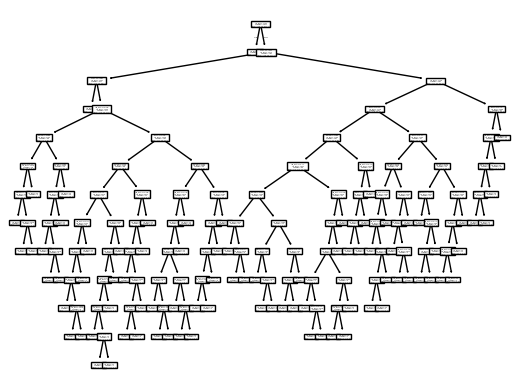

In [50]:
tree.plot_tree(tree_model_new.fit(X_train_transformed,y_train),feature_names=column_names)
plt.show()

In [51]:
# Iris data
df = pd.read_csv('Iris.csv')

In [52]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
df.drop('Id',axis=1,inplace=True)

In [54]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
X = df.drop('Species',axis=1)
y = df['Species']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3,random_state=10)

In [57]:
tree_model = DecisionTreeClassifier()

In [58]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

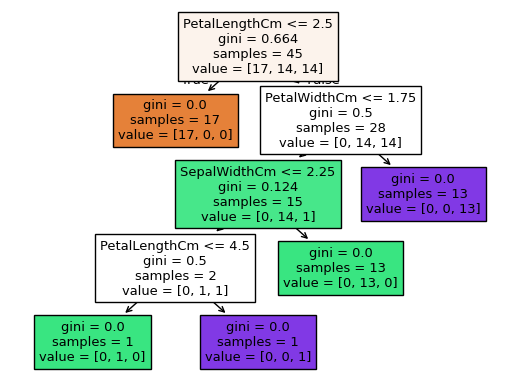

In [66]:
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)
plt.show()

In [67]:
y_pred = tree_model.predict(X_test)
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))
print("accuracy_score: \n", accuracy_score(y_test,y_pred))
print("classification_report: \n", classification_report(y_test,y_pred))

confusion_matrix: 
 [[33  0  0]
 [ 0 35  1]
 [ 0  4 32]]
accuracy_score: 
 0.9523809523809523
classification_report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        33
Iris-versicolor       0.90      0.97      0.93        36
 Iris-virginica       0.97      0.89      0.93        36

       accuracy                           0.95       105
      macro avg       0.96      0.95      0.95       105
   weighted avg       0.95      0.95      0.95       105



In [68]:
tree_model3 = DecisionTreeClassifier(max_depth=3)
tree_model3.fit(X_train,y_train)
y_pred2 = tree_model3.predict(X_test)
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred2))
print("accuracy_score: \n", accuracy_score(y_test,y_pred2))
print("classification_report: \n", classification_report(y_test,y_pred2))

confusion_matrix: 
 [[33  0  0]
 [ 0 35  1]
 [ 0  4 32]]
accuracy_score: 
 0.9523809523809523
classification_report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        33
Iris-versicolor       0.90      0.97      0.93        36
 Iris-virginica       0.97      0.89      0.93        36

       accuracy                           0.95       105
      macro avg       0.96      0.95      0.95       105
   weighted avg       0.95      0.95      0.95       105



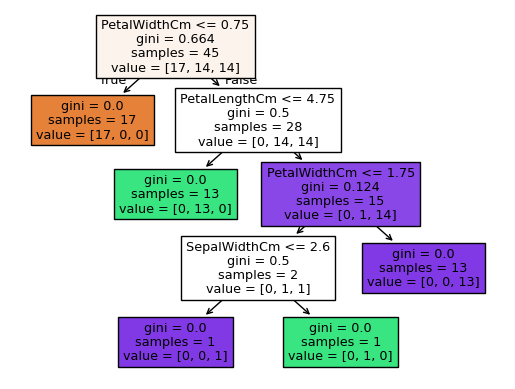

In [69]:
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)
plt.show()

In [70]:
# decision tree regression data set 